In [276]:
#Calculating glass Transition temperature using quenching output
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [277]:
# Read the Log file 
file = open("90/log_Tg.lammps", "r")

#Below collects all data in the text file as a list of each line (as a list with each phrase/number as an element)
list_of_lists = []
for line in file:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    list_of_lists.append(line_list)

file.close()

In [278]:
alldata=[]
breakpts=[]
for i in range(len(list_of_lists)):
    try:
        if list_of_lists[i][0] =='Step':
            data = list_of_lists[i+1:]
        for i in range(len(data)):
            if data[i][0]=='Loop':
                data = data[:i]
                breakpts.append(data[-1][0])
                alldata = alldata+data[-20:] #This only takes the last 10 points of data from each block
    except:
        pass

In [279]:
breakpts = [float(i) for i in breakpts] #this is a list of the last step point before a new block.

In [280]:
#Takes all blocks and converts it into a large dataframe
df=pd.DataFrame(alldata,columns=['Step','Volume','Density','Temp','Press','TotEng'])
for i in range(len(df.columns)):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], downcast="float")


In [281]:
#slices the large dataframe at each break point and takes the average of 
#each column up to that row as a new row of a new dataframe. 
Final = pd.DataFrame(columns=['Volume','Density','Temp','Press','TotEng'])
dfc = df.copy()

for i in range(len(alldata)):
    try:
        for n in breakpts:
            if dfc.iloc[i,0]==n:
                Final = Final.append({'Volume' : dfc['Volume'].iloc[:i].mean(), 'Density' : dfc['Density'].iloc[:i].mean(),
                                  'Temp' : dfc['Temp'].iloc[:i].mean(),'Press' : dfc['Press'].iloc[:i].mean(),
                                  'TotEng' : dfc['TotEng'].iloc[:i].mean()}, ignore_index=True)
                dfc = dfc.iloc[i:,:]
    except:
        pass

Final.to_csv('Average_log_TRP20.csv')

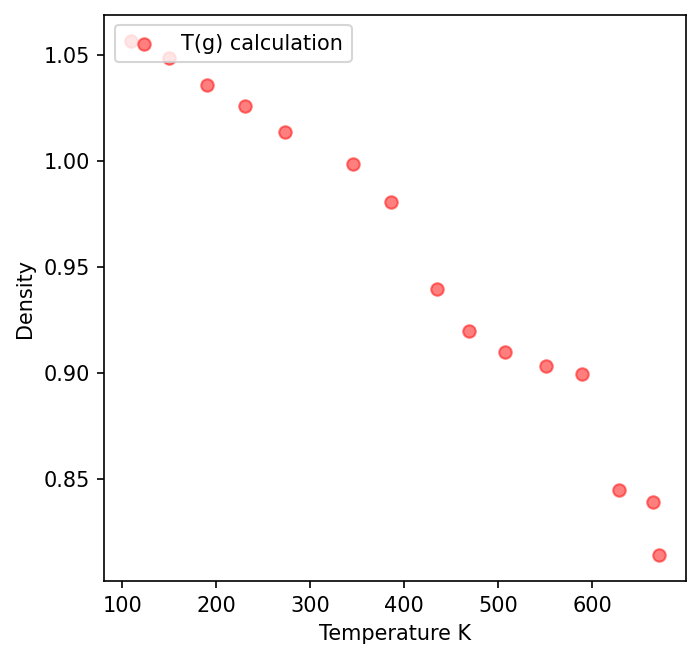

In [282]:
#Use Matpolt to plot density Vs Temperature
data = pd.DataFrame(Final)
data
plt.figure(figsize=(5,5), dpi=150)
plt.subplot(1,1,1)

plt.scatter(data['Temp'], data['Density'],c="r", alpha=0.5, marker='o',label="T(g) calculation")

x= data['Temp']
y= data['Density']

plt.xlabel("Temperature K")
plt.ylabel("Density")
plt.legend(loc='upper left')
plt.show()


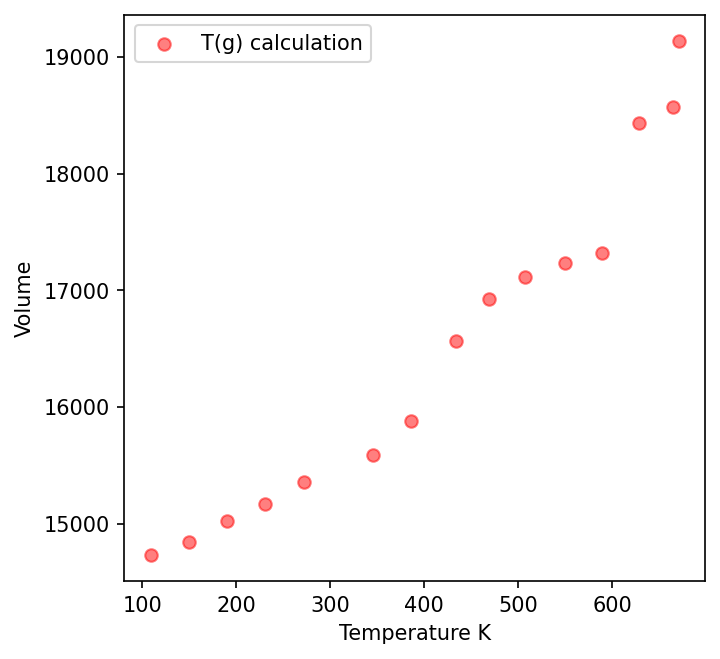

In [283]:
#Use Matplot to plot volume vs Temperature : 
data = pd.DataFrame(Final)
data
plt.figure(figsize=(5,5), dpi=150)
plt.subplot(1,1,1)

plt.scatter(data['Temp'], data['Volume'],c="r", alpha=0.5, marker='o',label="T(g) calculation")

x1= data['Temp']
y1= data['Volume']

plt.xlabel("Temperature K")
plt.ylabel("Volume")
plt.legend(loc='upper left')
plt.show()



In [284]:
import numpy as np
from scipy.optimize import curve_fit

# Define the bilinear function
def bilinear(x, a, b, c, d):
    return np.piecewise(x, [x < c, x >= c], [lambda x: a*x + b, lambda x: d*(x-c) + a*c + b])

# Define the data points
xdata = np.array(x1)
ydata = np.array(y1)
print(xdata)
# Fit the data using the bilinear function
popt, _ = curve_fit(bilinear, xdata, ydata)

# Find the intersection point
intersection_point = (popt[3]-popt[1])/(popt[0]-popt[2])

# Print the results
print(f"Equation: y = {popt[0]}x + {popt[1]} for x < {popt[2]}, y = {popt[3]}(x-{popt[2]})+{popt[0]*popt[2]+popt[1]} for x >= {popt[2]}")
print(f"Intersection Point: ({intersection_point}, {bilinear(intersection_point, *popt)})")


[664.71075439 670.98522949 628.06091309 589.29650879 550.2364502
 507.50302124 468.83218384 434.19955444 385.96087646 345.62454224
 272.55792236 230.63647461 189.85409546 149.43809509 108.90039062]
Equation: y = 38665.87941475001x + -25158.65125307561 for x < 1.0, y = 7.327358472088587(x-1.0)+13507.228161674397 for x >= 1.0
Intersection Point: (0.6508743591722491, 7.978232831257628)



                    Breakpoint Regression Results                     
No. Observations                       15
No. Model Parameters                    4
Degrees of Freedom                     11
Res. Sum of Squares            0.00160262
Total Sum of Squares            0.0905531
R Squared                        0.982302
Adjusted R Squared               0.975223
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                1.08649       0.0186       58.524      4.48e-15       1.0456       1.1274
alpha1          -0.000264831     9.34e-05      -2.8367        0.0162  -0.00047031   -5.935e-05
beta1           -0.000240267     9.97e-05      -2.4107             -  -0.00045964  -2.0899e-05
breakpoint1          347.235         71.7            -             -       189.46       505.01
-----------------

/Users/alotmi.m/anaconda3/lib/python3.8/site-packages/piecewise_regression/davies.py:51: RuntimeWarning: invalid value encountered in double_scalars
  S = S / (np.sqrt(np.abs(V)))


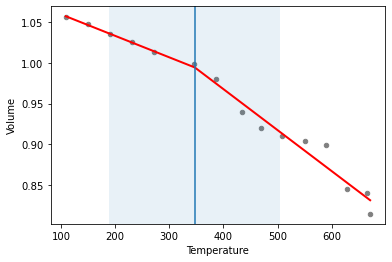

In [285]:
#implemet Piecewise-Regression to Find Tg 
import matplotlib.pyplot as plt
import numpy as np
import piecewise_regression
xx = list (x)
yy = list (y)
pw_fit = piecewise_regression.Fit(xx, yy, n_breakpoints=1)
pw_fit.summary()



# Plot the data, fit, breakpoints and confidence intervals
pw_fit.plot_data(color="grey", s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="red", linewidth=2)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("Temperature")
plt.ylabel("Volume")
plt.show()
plt.close()


                    Breakpoint Regression Results                     
No. Observations                       15
No. Model Parameters                    4
Degrees of Freedom                     11
Res. Sum of Squares            0.00160262
Total Sum of Squares            0.0905531
R Squared                        0.982302
Adjusted R Squared               0.975223
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                1.08649       0.0186       58.524      4.48e-15       1.0456       1.1274
alpha1          -0.000264831     9.34e-05      -2.8367        0.0162  -0.00047031   -5.935e-05
beta1           -0.000240267     9.97e-05      -2.4107             -  -0.00045964  -2.0899e-05
breakpoint1          347.235         71.7            -             -       189.46       505.01
-----------------

/Users/alotmi.m/anaconda3/lib/python3.8/site-packages/piecewise_regression/davies.py:51: RuntimeWarning: invalid value encountered in double_scalars
  S = S / (np.sqrt(np.abs(V)))


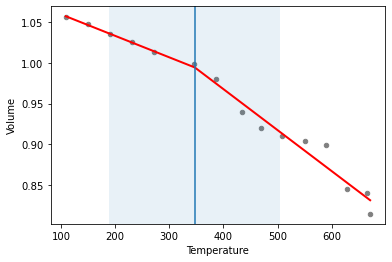

In [286]:
#implemet Piecewise-Regression to Find Tg 
import matplotlib.pyplot as plt
import numpy as np
import piecewise_regression
xx = list (x)
yy = list (y)
pw_fit = piecewise_regression.Fit(xx, yy, n_breakpoints=1)
pw_fit.summary()



# Plot the data, fit, breakpoints and confidence intervals
pw_fit.plot_data(color="grey", s=20)
# Pass in standard matplotlib keywords to control any of the plots
pw_fit.plot_fit(color="red", linewidth=2)
pw_fit.plot_breakpoints()
pw_fit.plot_breakpoint_confidence_intervals()
plt.xlabel("Temperature")
plt.ylabel("Volume")
plt.show()
plt.close()